## 7. Popularity-based Model

This is the baseline approach to compare other models. We will assign the most N popular games to each gamer and compute the Hit Gain Ratio

In [1]:
import pandas as pd
import numpy as np


In [2]:
### All random states are assigned to 42 for reproducible results
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


### Sorting top-N Popularity

Exploring columns to represent popularity of games

In [3]:
%run "01.Recommendation_Loading.ipynb"

################  Recommendations (all data, positive recommendations only) ################
Users: 12,636,209
Games: 37,419
Number of users 10,000
First five users id [11203022 12827342 11719330  9553563 11051045]
################  Recommendations (Sample) ################
Minimum number of recommendations to included in the sample: 20
Number of randomly selected users: 10000
Users: 9,688
Games: 20,615
################ User-Game Matrix ################
Number of Rows: 9,689
Numbeer of Columns: 20,616
Number of stored values: 365,753


In [4]:
def get_popular_games(df, K_pop):
    rec_pop = df.groupby("app_id_categorical")\
                        .is_recommended.agg(["sum"])\
                        .sort_values("sum", ascending=False)\
                        .reset_index()\
                        .head(K_pop)\
                        .loc[:,["app_id_categorical", "sum"]]
                        #.values
    return rec_pop

recommendations_pop = get_popular_games(recommendations, 10)
recommendations_pop

,app_id_categorical,sum
0,2488,1221
1,22,1187
2,13742,1170
3,4318,1161
4,18,1161
5,20,1139
6,4426,1116
7,990,1097
8,4370,1045
9,9,1037


In [5]:
games_top_pop = recommendations_pop.loc[:,"app_id_categorical"]
games_top_pop.head()

0     2488
1       22
2    13742
3     4318
4       18
Name: app_id_categorical, dtype: int64

In [6]:
games_idx = pd.read_csv('matrix/games_idx.csv')
games_idx.head()


,app_id,app_id_categorical
0,292030,2488
1,319630,3067
2,38410,583
3,244450,1577
4,1461680,17120


In [7]:
games_idx_pop = games_idx[games_idx["app_id_categorical"].isin(games_top_pop)]
games_idx_pop

,app_id,app_id_categorical
0,292030,2488
5,377160,4370
6,1091500,13742
54,620,22
80,550,20
92,374320,4318
96,203160,990
148,220,9
225,440,18
449,379720,4426


In [8]:
games_idx_pop = pd.merge(games_idx_pop, recommendations_pop,
                         left_on="app_id_categorical",
                         right_on="app_id_categorical")
games_idx_pop

,app_id,app_id_categorical,sum
0,292030,2488,1221
1,377160,4370,1045
2,1091500,13742,1170
3,620,22,1187
4,550,20,1139
5,374320,4318,1161
6,203160,990,1097
7,220,9,1037
8,440,18,1161
9,379720,4426,1116


In [9]:
games = pd.read_csv("resources/games.csv")
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,10.0,10.0,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,3.0,3.0,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,15.0,15.0,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,15.0,15.0,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,12.0,12.0,0.0,True


Let's see the top K games by popularity

In [16]:
pop_games_df = pd.merge(games_idx_pop,games, left_on="app_id", right_on="app_id")
pop_games_df

,app_id,app_id_categorical,sum,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,292030,2488,1221,The Witcher® 3: Wild Hunt,2015-05-18,True,False,False,Overwhelmingly Positive,96,668455,40.0,0.0,0.0,True
1,377160,4370,1045,Fallout 4,2015-11-09,True,False,False,Very Positive,83,205094,20.0,0.0,0.0,True
2,1091500,13742,1170,Cyberpunk 2077,2020-12-09,True,False,False,Very Positive,80,557051,60.0,0.0,0.0,True
3,620,22,1187,Portal 2,2011-04-18,True,True,True,Overwhelmingly Positive,98,293053,10.0,0.0,0.0,True
4,550,20,1139,Left 4 Dead 2,2009-11-16,True,True,True,Overwhelmingly Positive,97,574470,10.0,0.0,0.0,True
5,374320,4318,1161,DARK SOULS™ III,2016-04-11,True,False,False,Very Positive,94,230407,30.0,0.0,0.0,True
6,203160,990,1097,Tomb Raider,2013-03-04,True,True,True,Overwhelmingly Positive,96,136055,3.0,15.0,80.0,True
7,220,9,1037,Half-Life 2,2007-10-10,True,True,True,Overwhelmingly Positive,97,122230,10.0,10.0,0.0,True
8,440,18,1161,Team Fortress 2,2007-10-10,True,True,True,Very Positive,93,985819,0.0,0.0,0.0,True
9,379720,4426,1116,DOOM,2016-05-12,True,False,False,Overwhelmingly Positive,95,121343,20.0,0.0,0.0,True


In [19]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
{}

In [25]:
print(pop_games_df[["title","sum"]].rename({"title":"Game", "sum":"# reviews"}, axis=1).to_markdown())

|    | Game                      |   # reviews |
|---:|:--------------------------|------------:|
|  0 | The Witcher® 3: Wild Hunt |        1221 |
|  1 | Fallout 4                 |        1045 |
|  2 | Cyberpunk 2077            |        1170 |
|  3 | Portal 2                  |        1187 |
|  4 | Left 4 Dead 2             |        1139 |
|  5 | DARK SOULS™ III           |        1161 |
|  6 | Tomb Raider               |        1097 |
|  7 | Half-Life 2               |        1037 |
|  8 | Team Fortress 2           |        1161 |
|  9 | DOOM                      |        1116 |


|    | Game                      |   # reviews |
|---:|:--------------------------|------------:|
|  0 | The Witcher® 3: Wild Hunt |        1221 |
|  1 | Fallout 4                 |        1045 |
|  2 | Cyberpunk 2077            |        1170 |
|  3 | Portal 2                  |        1187 |
|  4 | Left 4 Dead 2             |        1139 |
|  5 | DARK SOULS™ III           |        1161 |
|  6 | Tomb Raider               |        1097 |
|  7 | Half-Life 2               |        1037 |
|  8 | Team Fortress 2           |        1161 |
|  9 | DOOM                      |        1116 |

Define game popularity as the highest number of recommended reviews:

In [11]:
%run "Get_Training_and_Test_Instances.ipynb"

################  Get Test Data ################
x_test.shape: (9688, 2)
y_test.shape: (9688, 1)
Number of Users: 9,689
Number of Games: 20,616
Number of Negatives Sample per User-Game: 2
################  Get Training Data ################
x_train.shape: (1094928, 2)
y_train.shape: (1094928, 2)


In [12]:
games_top_pop_values = games_top_pop.values
games_top_pop_values

array([ 2488,    22, 13742,  4318,    18,    20,  4426,   990,  4370,
           9])

In [13]:
eval_hit_ratio_pop(games_top_pop_values, x_test)

0.004644921552436003

In [14]:
hgr_pop_list = []
for k in range(50):
    recommendations_pop = get_popular_games(recommendations, k)
    games_top_pop_values = recommendations_pop.loc[:,"app_id_categorical"].values
    hgr_pop = eval_hit_ratio_pop(games_top_pop_values, x_test)
    hgr_pop_list.append(hgr_pop)
    print("Top @", k, "popular games,", "Hit Gain Ratio", '{0:.4%}'.format(hgr_pop))
    

Top @ 0 popular games, Hit Gain Ratio 0.0000%
Top @ 1 popular games, Hit Gain Ratio 0.0000%
Top @ 2 popular games, Hit Gain Ratio 0.0000%
Top @ 3 popular games, Hit Gain Ratio 0.4232%
Top @ 4 popular games, Hit Gain Ratio 0.4232%
Top @ 5 popular games, Hit Gain Ratio 0.4232%
Top @ 6 popular games, Hit Gain Ratio 0.4232%
Top @ 7 popular games, Hit Gain Ratio 0.4232%
Top @ 8 popular games, Hit Gain Ratio 0.4232%
Top @ 9 popular games, Hit Gain Ratio 0.4645%
Top @ 10 popular games, Hit Gain Ratio 0.4645%
Top @ 11 popular games, Hit Gain Ratio 0.4748%
Top @ 12 popular games, Hit Gain Ratio 0.4748%
Top @ 13 popular games, Hit Gain Ratio 0.4748%
Top @ 14 popular games, Hit Gain Ratio 0.4748%
Top @ 15 popular games, Hit Gain Ratio 0.4748%
Top @ 16 popular games, Hit Gain Ratio 0.4748%
Top @ 17 popular games, Hit Gain Ratio 0.5058%
Top @ 18 popular games, Hit Gain Ratio 0.5884%
Top @ 19 popular games, Hit Gain Ratio 1.1870%
Top @ 20 popular games, Hit Gain Ratio 1.1870%
Top @ 21 popular games,

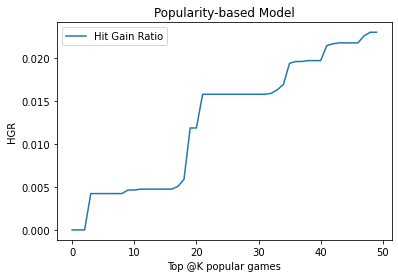

In [15]:
plt.plot(hgr_pop_list, label="Hit Gain Ratio")
plt.title("Popularity-based Model")
plt.xlabel("Top @K popular games")
plt.ylabel("HGR")
plt.legend()
plt.show()

# 